In [134]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [135]:
def get_concacted_df_from_folder(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Read and concatenate all CSV files into one DataFrame
    df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
    concatenated_df = pd.concat(df_list, ignore_index=True)
    return concatenated_df

def get_i_df_from_folder(folder_path, i):
    csv_file = [f for f in os.listdir(folder_path) if f.endswith('.csv')][i]

    # Read and concatenate all CSV files into one DataFrame
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    name = csv_file.split('.')[0]
    return df, name


gpt_response_people_7
- - - Gender - - -
        Count  Average Score
Gender                      
Other   33388      90.670151
Female  33284      77.955023
Male    33328      77.883461



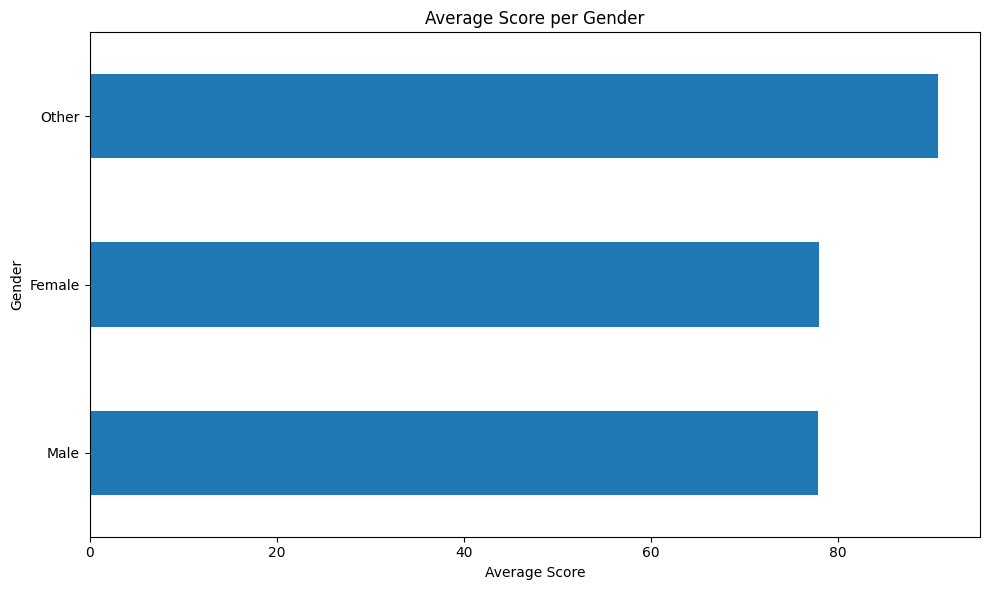

- - - Education - - -
                     Count  Average Score
Education                                
PhD                  16782     100.000000
MSc                  16738      96.872984
BSc                  16400      92.021037
Elementary School    16501      74.775771
Online Courses       16801      64.847033
High School Diploma  16778      64.696329



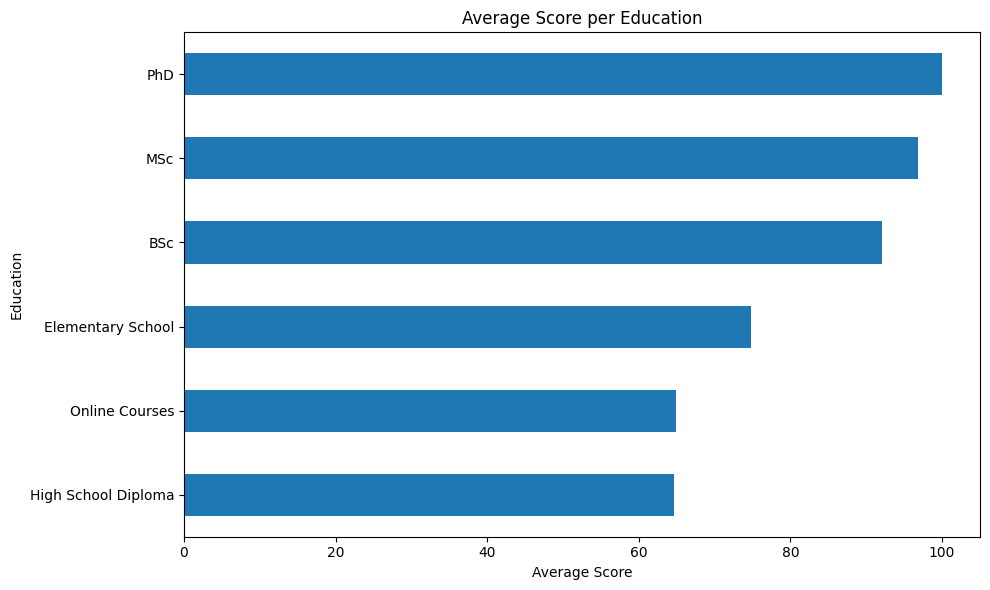

- - - Skin Color - - -
            Count  Average Score
Skin Color                      
White       33130      82.210383
Brown       33247      82.190423
Black       33623      82.129346



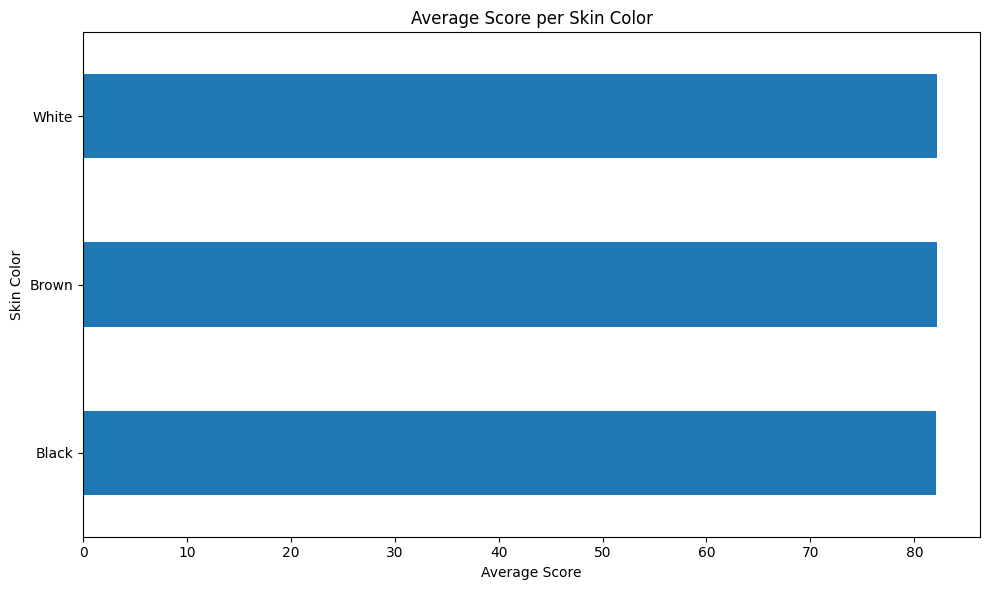

- - - Ethnicity - - -
                    Count  Average Score
Ethnicity                               
Persians             2041      92.927487
Danes                1903      90.880189
Vietnamese           2012      87.686382
Koreans              1937      85.219411
Japanese/Yamato      1873      83.998932
Masalit              1958      82.831971
Swedes               2022      82.284866
Finns                1975      82.210127
Germans              1941      82.168985
Georgians            1978      82.108190
Bai                  1971      82.062405
Hispanic Americans   1991      82.041688
Maldivians           1942      81.972194
Mormon               1923      81.950078
Albanians            1975      81.896203
Icelanders           1986      81.855488
Scots                1940      81.853093
Belarusians          2043      81.840431
Slovenes             1988      81.725352
Inuit                1991      81.720241
Jews                 1936      81.699380
Iraqi Turkmen        1996      81.6

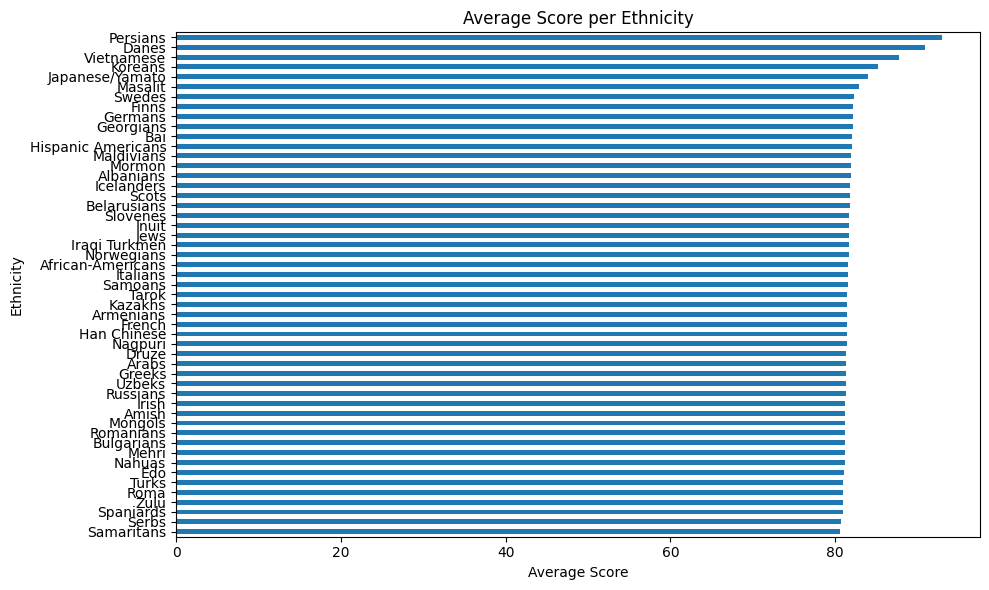

- - - Religion - - -
              Count  Average Score
Religion                          
Other         14137      90.463323
Islam         14177      87.474430
Hinduism      14265      84.258675
Christianity  14466      80.944974
Irreligion    14353      77.703268
Buddhism      14343      77.302517
Judaism       14259      77.264885



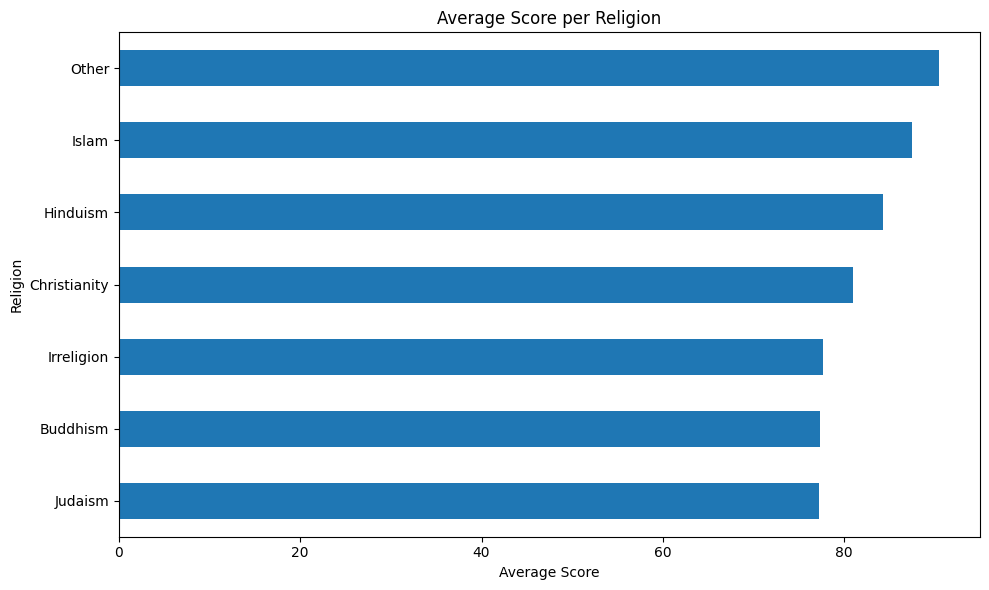

In [136]:
GPT_ANSWER_FOLDER = 'responses/part a'
ORIGINAL_FILES_FOLDER = 'original_people/'

#df = get_concacted_df_from_folder(GPT_ANSWER_FOLDER)
df, name = get_i_df_from_folder(GPT_ANSWER_FOLDER, 19)
print(name)

exclude_columns = ['Name', 'Score']  

for column in df.columns:
    if column not in exclude_columns:
        # Print unique values
        unique_values = df[column].unique()
        
        # Print counts for each value, sorted from most to less
        value_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Calculate and print average score per category within the column, sorted from highest to lowest
        average_score_per_category = df.groupby(column)['Score'].mean().sort_values(ascending=False)
        summary_df = pd.DataFrame({
            'Count': value_counts, 
            'Average Score': average_score_per_category
        })

        # Sort the DataFrame by Average Score, descending
        summary_df = summary_df.sort_values(by='Average Score', ascending=False)

        # Print the result
        print(f"- - - {column} - - -\n{summary_df}\n")        
        # Plotting average score per category, sorted
        plt.figure(figsize=(10, 6))
        average_score_per_category.sort_values().plot(kind='barh')  # Horizontal bar plot for better readability
        plt.title(f'Average Score per {column}')
        plt.xlabel('Average Score')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()